In [56]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
df = pd.read_csv('../Data/depo-measurements.csv')
df_test = pd.read_csv('../Data/depo-features-test.csv')

In [18]:
df['flange_width_diff'] = 0
df['days_diff'] = 0
df['day'] = 0

In [19]:
# фильтрация
df_new = pd.DataFrame(columns=df.columns)

for wheel_id in tqdm(df.wheel_id.unique()):
    df_wheel = df[df.wheel_id == wheel_id]
    df_wheel = df_wheel.sort_values(by='date', ascending=True, inplace=False)
    prev_index = -1
    first_day = -1
    for index, row in df_wheel.iterrows():
        # для 1й строки в группе данных по колесу
        if prev_index == -1:
            prev_index = index
            first_day = row.date
            continue

        days_diff = df_wheel.loc[index, 'date'] - df_wheel.loc[prev_index, 'date']
        flange_width_diff = df_wheel.loc[index, 'flange_width'] - df_wheel.loc[prev_index, 'flange_width']

        row.days_diff = days_diff
        row.flange_width_diff = flange_width_diff
        row.day = row.date - first_day

        if flange_width_diff < 0 and (10 <= days_diff <= 50):
            df_new = df_new.append(row)
            prev_index = index

In [80]:
print(df_new.shape)
df_new.head(50)

(4085, 11)


,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,flange_width_diff,days_diff,day
3623,1331.0,34.26,28.81,11.17,4.26,75.99,1221.97,110.0,-1.27,49.0,49.0
6057,1331.0,34.34,28.56,11.19,4.34,78.20,1226.40,121.0,-0.25,11.0,60.0
17023,1331.0,34.96,28.07,11.13,4.96,74.47,1217.44,145.0,-0.49,24.0,84.0
28848,1331.0,32.64,27.49,8.86,0.65,68.64,1203.78,189.0,-0.58,44.0,128.0
31413,1331.0,32.72,27.28,9.07,2.72,68.24,1200.00,202.0,-0.21,13.0,141.0
3581,1330.0,34.76,29.91,10.51,4.76,65.17,1200.33,110.0,-1.54,49.0,49.0
17024,1330.0,34.52,29.52,10.51,4.52,72.55,1213.80,145.0,-0.39,35.0,84.0
28849,1330.0,32.88,27.14,9.22,0.89,68.26,1205.72,189.0,-2.38,44.0,128.0
31406,1330.0,33.25,26.69,9.23,3.25,67.37,1200.00,202.0,-0.45,13.0,141.0
3599,1328.0,33.47,29.51,9.48,3.47,70.33,1210.67,110.0,-0.29,49.0,49.0


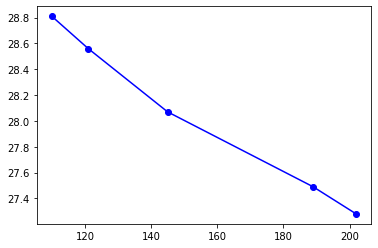

In [63]:
df_wheel = df_new[df_new.wheel_id == 1331.0]
#df_wheel['day'] = df_wheel['day'] - 49
#df_wheel['flange_width'].plot()
plt.plot(df_wheel['date'], df_wheel['flange_width'], 'bo-')

In [ ]:
for i in range(1, 20):
    wheel_id = df_new.wheel_id.unique()[i]
    df_wheel = df_new[df_new.wheel_id == wheel_id]
    print(df_wheel.iloc[0]['days_diff'])
    plt.plot(df_wheel['date'], df_wheel['flange_width'], 'bo-')
    plt.show()

In [93]:
wheel_id_list = df_new.wheel_id.unique()
print(len(wheel_id_list))
wheel_count = len(wheel_id_list)
train_count = int(wheel_count * 0.8)
test_count = wheel_count - train_count

train_ids = wheel_id_list[:train_count]
test_ids = wheel_id_list[train_count:]

print(train_ids.shape)
print(test_ids.shape)
train_ids[:10]

2469
(1975,)
(494,)


array([1331., 1330., 1328., 1329., 1332., 1334., 1335., 1338., 1339.,
       1340.])

In [ ]:
regr = linear_model.LinearRegression()
for wheel_id in train_ids:
    df_wheel = df_new[df_new.wheel_id == wheel_id]
    if len(df_wheel) < 2: continue
    df_wheel.day -= df_wheel.iloc[0]['days_diff'] ###
    
#     plt.plot(df_wheel['day'], df_wheel['flange_width'], 'bo-')
#     plt.show()    
        
    x = df_wheel.day.to_numpy().reshape(-1, 1)
    y = df_wheel.flange_width
    
    
    regr.fit(x, y)    

In [100]:
regr.coef_

array([-0.06466667])

In [101]:
for wheel_id in test_ids:
    df_wheel = df_new[df_new.wheel_id == wheel_id]
    if len(df_wheel) < 2: continue
    df_wheel.day -= df_wheel.iloc[0]['days_diff']
    x = df_wheel.day.to_numpy().reshape(-1, 1)
    y_test = df_wheel.flange_width
    
    y_pred = regr.predict(x)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Mean squared error: 2.29
Coefficient of determination: -0.09
Mean squared error: 0.69
Coefficient of determination: -3.03
Mean squared error: 2.72
Coefficient of determination: -173.19
Mean squared error: 0.26
Coefficient of determination: -2.93
Mean squared error: 1.08
Coefficient of determination: -1.08
Mean squared error: 1.22
Coefficient of determination: -13.01
Mean squared error: 0.53
Coefficient of determination: 0.01
Mean squared error: 0.81
Coefficient of determination: -1.64
Mean squared error: 1.33
Coefficient of determination: 0.47
Mean squared error: 7.03
Coefficient of determination: -384.87
Mean squared error: 1.03
Coefficient of determination: 0.39
Mean squared error: 1.27
Coefficient of determination: 0.72
Mean squared error: 1.88
Coefficient of determination: -110.34
Mean squared error: 2.44
Coefficient of determination: -73.37
Mean squared error: 8.90
Coefficient of determination: -2942.08
Mean squared error: 1.51
Coefficient of determination: -2.46
Mean squared erro

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


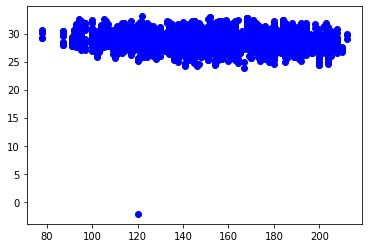

In [72]:
plt.scatter(df_new.date, df_new.flange_width,  color='blue')

In [73]:
df_wheel = df_new[df_new.wheel_id == 1331]

x = df_new.date
x = x.to_numpy()
x = x.reshape(-1, 1)

y = df_new.flange_width

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)

(3268, 1)


In [75]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred = regr.predict(X_test)

In [77]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.00336854]


In [78]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 2.72
Coefficient of determination: 0.01


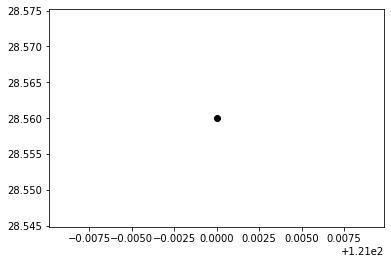

In [71]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()